In [1]:
# Importing all the necessary library

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("KKI_phenotypic.csv")

In [3]:
df.isnull().sum()

ScanDir ID          0
Site                0
Gender              0
Age                 0
Handedness          0
DX                  0
Secondary Dx       68
ADHD Measure        0
ADHD Index          0
Inattentive         0
Hyper/Impulsive     0
IQ Measure          0
Verbal IQ           0
Performance IQ      0
Full2 IQ           83
Full4 IQ            0
Med Status          0
QC_Rest_1           0
QC_Rest_2          83
QC_Rest_3          83
QC_Rest_4          83
QC_Anatomical_1     0
QC_Anatomical_2    83
dtype: int64

In [4]:
df = df.dropna(axis=1)

In [5]:
df.isnull().sum()

ScanDir ID         0
Site               0
Gender             0
Age                0
Handedness         0
DX                 0
ADHD Measure       0
ADHD Index         0
Inattentive        0
Hyper/Impulsive    0
IQ Measure         0
Verbal IQ          0
Performance IQ     0
Full4 IQ           0
Med Status         0
QC_Rest_1          0
QC_Anatomical_1    0
dtype: int64

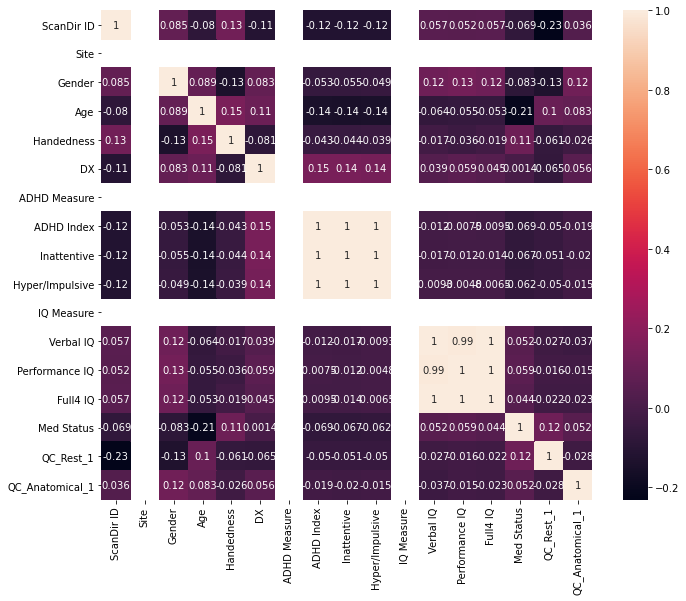

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

In [7]:
train, test = train_test_split(df)

In [8]:
train

,ScanDir ID,Site,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Anatomical_1
64,3972956,3,1,10.12,1,0,2,41,41,43,1,134,127,131,1,1,1
14,1779922,3,1,10.84,1,0,2,43,41,48,1,110,92,105,1,1,1
42,2822304,3,0,9.62,1,0,2,50,44,60,1,119,98,111,1,1,1
23,2026113,3,0,12.99,1,1,2,90,89,78,1,81,98,88,1,1,1
33,2572285,3,1,8.33,1,0,2,46,48,43,1,100,106,99,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3902469,3,1,10.64,1,0,2,50,53,50,1,132,112,124,1,1,1
79,8432725,3,0,11.51,1,0,2,-999,-999,-999,1,126,102,116,1,1,1
17,1873761,3,0,10.36,1,1,2,90,90,90,1,102,110,115,1,1,1
12,1692275,3,0,10.78,1,0,2,42,42,43,1,114,102,116,1,1,1


In [9]:
X = train.drop(columns = ['DX'])
y = train[['ADHD Index', 'DX']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Building our Random Forest Model

clf = RandomForestClassifier(max_depth=10, random_state=49)
# max_depth: The number of splits that each decision tree is allowed to make

In [12]:
# Fitting the Model with training data

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=49)

In [13]:
# Predicting the Test set results

y_pred = clf.predict(X_test)

In [14]:
import numpy as np
# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: ADHD Index    0.153846
DX            0.769231
dtype: float64


In [22]:
from sklearn.multioutput import MultiOutputClassifier
classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=100))

# Fit the model to the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)


In [23]:
y_pred

array([[42,  0],
       [71,  0],
       [41,  0],
       [49,  0],
       [79,  1],
       [42,  0],
       [41,  0],
       [50,  0],
       [77,  1],
       [79,  1],
       [46,  0],
       [77,  3],
       [42,  0]], dtype=int64)

In [24]:
import numpy as np
# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: ADHD Index    0.230769
DX            0.769231
dtype: float64


In [26]:
y_pred = y_pred[:, 1:]

In [27]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: ADHD Index    0.000000
DX            0.769231
dtype: float64


In [32]:
y_test = y_test.drop(y_test.columns[0], axis=1)

In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[8 0 0]
 [1 2 1]
 [0 1 0]]


In [34]:
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: DX    0.769231
dtype: float64


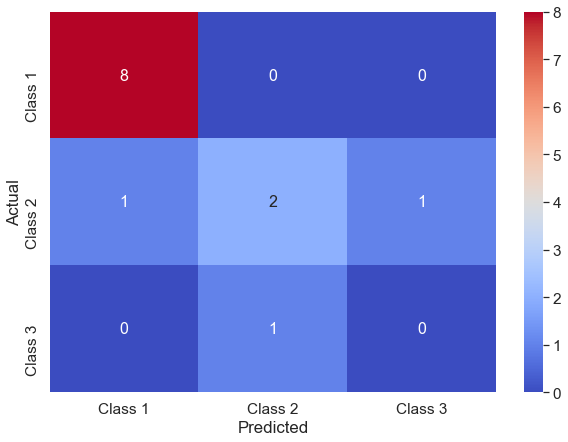

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="coolwarm", 
            xticklabels=["Class 1", "Class 2", "Class 3"], 
            yticklabels=["Class 1", "Class 2", "Class 3"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.67      0.50      0.57         4
           3       0.00      0.00      0.00         1

    accuracy                           0.77        13
   macro avg       0.52      0.50      0.50        13
weighted avg       0.75      0.77      0.76        13

